#### Injection 

- Checking
- methods of removing

#### 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# if the files are in the same folder, we don;t need to use a path to the file
traffic_data= pd.read_csv("Traffic_Data.csv")

# but if the files are in different folders, we need to provide the path.
# if in th epath you're using '/' make sure to use only one by one ... but if youre using '\', use pairs 

# traffic_data= pd.read_csv("disk\\other\\path\\Traffic_Data.csv")
# traffic_data= pd.read_csv("disk/other/path/Traffic_Data.csv")

# ALSO : if the csv you have has semi-columns ';' instead of commas ',', we can add the delimiter= ';' 
# inside the importing code like this :

# traffic_data= pd.read_csv("Traffic_Data.csv", delimiter = ';')


In [13]:
# To see a sample of our traffic data, we use the .head() function

traffic_data.head()
# traffic_data.head(20) use this if you want to specify the number of rows that you want to see, here we want 20 rows

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,29.4268,0,0,14.7134,0.5241
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2,118.8000,0,0,143.5682,0.3208
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,100.3904,0,0,91.2640,0.0415
3,Ecoopolis,Drone,Clear,Booming,Thursday,8,76.8000,1,0,46.0753,0.1811
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday,16,45.2176,0,0,40.1934,0.4544


In [14]:
# you can also view the last rows by using the .tail() function

traffic_data.tail()

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
1219562,SolarisVille,Autonomous Vehicle,Electromagnetic Storm,Booming,Wednesday,13,75.7534,0,0,60.6027,0.3840
1219563,MetropolisX,Drone,Snowy,Booming,Saturday,1,24.7660,0,0,14.8122,0.5526
1219564,Neuroburg,Autonomous Vehicle,Snowy,Booming,Monday,19,75.6292,0,0,61.8568,0.0564
1219565,MetropolisX,Autonomous Vehicle,Clear,Booming,Monday,1,52.7983,0,0,85.7116,0.5079
1219566,Ecoopolis,Drone,Electromagnetic Storm,Stable,Saturday,22,86.4000,0,1,49.5233,0.3182


brieffly , that 👆🏽 is already some data analysis where we check the different columns in our data frame, we check the number of rows, we describe the table, we see the missing values and the outliers etc. 

## Exploratory Data Analysis or EDA

In [15]:
df= {
    'One' : pd.Series([100,200,300,400,500], index=['apples','oranges','mangoes','avocado','pears']),
    'Two' : pd.Series([80,400,100,70,600], index=['apples','oranges','mangoes','grapes','avocado'])
}

dataframe= pd.DataFrame(df)
dataframe

,One,Two
apples,100.0,80.0
avocado,400.0,600.0
grapes,NaN,70.0
mangoes,300.0,100.0
oranges,200.0,400.0
pears,500.0,NaN


### methods to handle missing values

- dropping missing values
- imputation
- interpolation
- filling forward
- filling backward

In [16]:
dataframe.isnull().sum()

One    1
Two    1
dtype: int64

#### Fillforward method

In [17]:
# this scenario 

dataframe.fillna(method='ffill') # ffill = forward fill

# here, the code we wrote is not acting on the real dataframe, because we did not tell it to "ACT" on the data frame
# to do that, we can use either the "inplace=True" method:

# dataframe.fillna(method='ffill', inplace=True)  

# or we can store the new dataframe into it self, like this: 

# dataframe = dataframe.fillna(method='ffill')




C:\Users\seth\AppData\Local\Temp\ipykernel_7580\1322966166.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataframe.fillna(method='ffill') # ffill = forward fill


,One,Two
apples,100.0,80.0
avocado,400.0,600.0
grapes,400.0,70.0
mangoes,300.0,100.0
oranges,200.0,400.0
pears,500.0,400.0


In [18]:
dataframe.fillna(method='bfill') # bfill = backward fill
# we cannot use this one if the last row value is Null or NaN

C:\Users\seth\AppData\Local\Temp\ipykernel_7580\4020006260.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataframe.fillna(method='bfill') # bfill = backward fill


,One,Two
apples,100.0,80.0
avocado,400.0,600.0
grapes,300.0,70.0
mangoes,300.0,100.0
oranges,200.0,400.0
pears,500.0,NaN


#### Droping method

this method is dangerous because we can loose a lot of data just because we have some small missing values, that is ehy other methods are better to use than this one. Here is how it works:

axis {
    0 - index   -- here we are droping all the rows with missing values
    1 - columns -- here we are droping all columns with missing values
}

In [19]:
dataframe.dropna(axis=0) # here we are droping all the rows(0) with missing value
dataframe.dropna(axis=1) # here we are droping all the columns(1) with missing value

""
apples
avocado
grapes
mangoes
oranges
pears


#### Interpolation method

Here the logic is the same as interpolation in math using the direct method (formula in the math book).
Here is how we interpolate 👇🏽

In [20]:
dataframe.interpolate()
# as you can see, it used the mathematical interpolation direct method.

,One,Two
apples,100.0,80.0
avocado,400.0,600.0
grapes,350.0,70.0
mangoes,300.0,100.0
oranges,200.0,400.0
pears,500.0,400.0


#### Imputation 🚀: 

This is the most used method when we are filling missing values inside very huge datasets amd dataframes.

Here it is all about DESCRIPTIVE STATISTICS. we have different measures of central tendency like:

- mean (for continous data or numbers)
- median (for continous data)
- mode (for categorical data)

#### Types of data: 

##### categorical data (here we use the MODE since it returns the most repetitive value from a dataframe)
##### continous data (here we use either MEAN or MEDIAN), but this depends on two things:

- if the continous data is skewed, then we will use the median  (skewed to the right or the left)
- if the continous data is normalized, then we will use the mean (data is focused in the center)

### NOW LET US WORK WITH THE DATASETS WE HAVE:

In [21]:
train_data= pd.read_csv("Train.csv")

In [22]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               1
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               5
dtype: int64

In [23]:
train_data.dtypes

# object = text or categorical data
# others = numbers or continous data

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

### Let's group the data now

In [24]:
cont_data= train_data.select_dtypes(include=['int64', 'float64'])
cat_data= train_data.select_dtypes(include='object')

# here we are creating two data frames, one for continous data and another for categorical data
# we are including all continous data inside the cont_data dataframe, and all categorical data inside cat_data.

# this is because we may want to visualize the continous data for some specific purpose (like visualiation).

### Imputing for missing values 

### Cont Data :

- visualize ditributions

<function matplotlib.pyplot.show(close=None, block=None)>

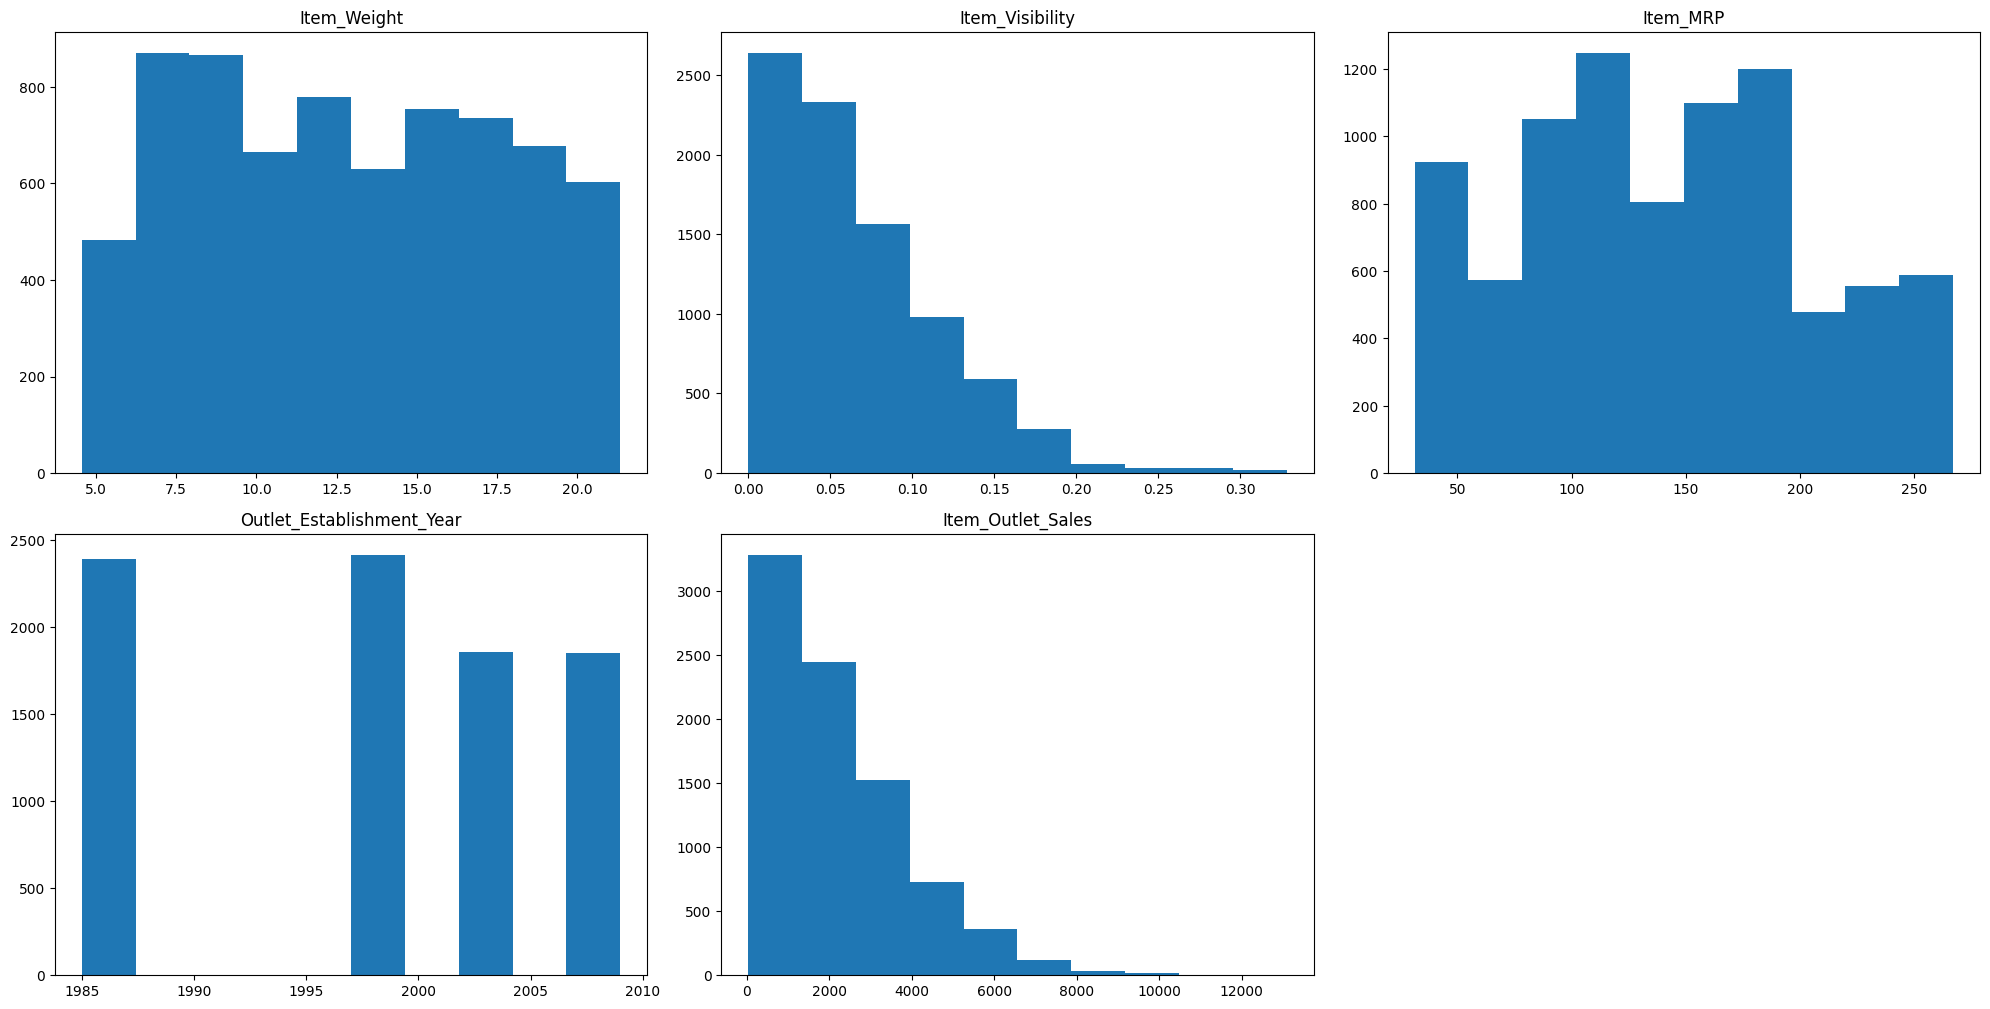

In [25]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(cont_data.columns):
    plt.subplot(4,3, i+1)
    plt.hist(train_data[col])
    plt.title(col)
plt.tight_layout()
plt.show

We can tell that all the data visualized up here are skewed. for that we will be using the MEDIAN for the imputation method of the continous data.

### Imputing For This Data

In [26]:
train_data['Item_Weight'] = train_data['Item_Weight'].fillna(train_data['Item_Weight'].median())
train_data['Item_Outlet_Sales'] = train_data['Item_Outlet_Sales'].fillna(train_data['Item_Outlet_Sales'].median())

In [27]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               1
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [28]:
train_data['Outlet_Identifier'] = train_data['Outlet_Identifier'].fillna(train_data['Outlet_Identifier'].mode()[0])



In [29]:

train_data['Outlet_Size'] = train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0])

In [30]:
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Outliers : using the measures of dispersion

Here we have :

- Range
- IQR (interquartile range)
- Min 
- Max 
- Lower quanrtile 
- upper quanrtile 


Here we will be using a Box Plot for Outliers visualization.

<function matplotlib.pyplot.show(close=None, block=None)>

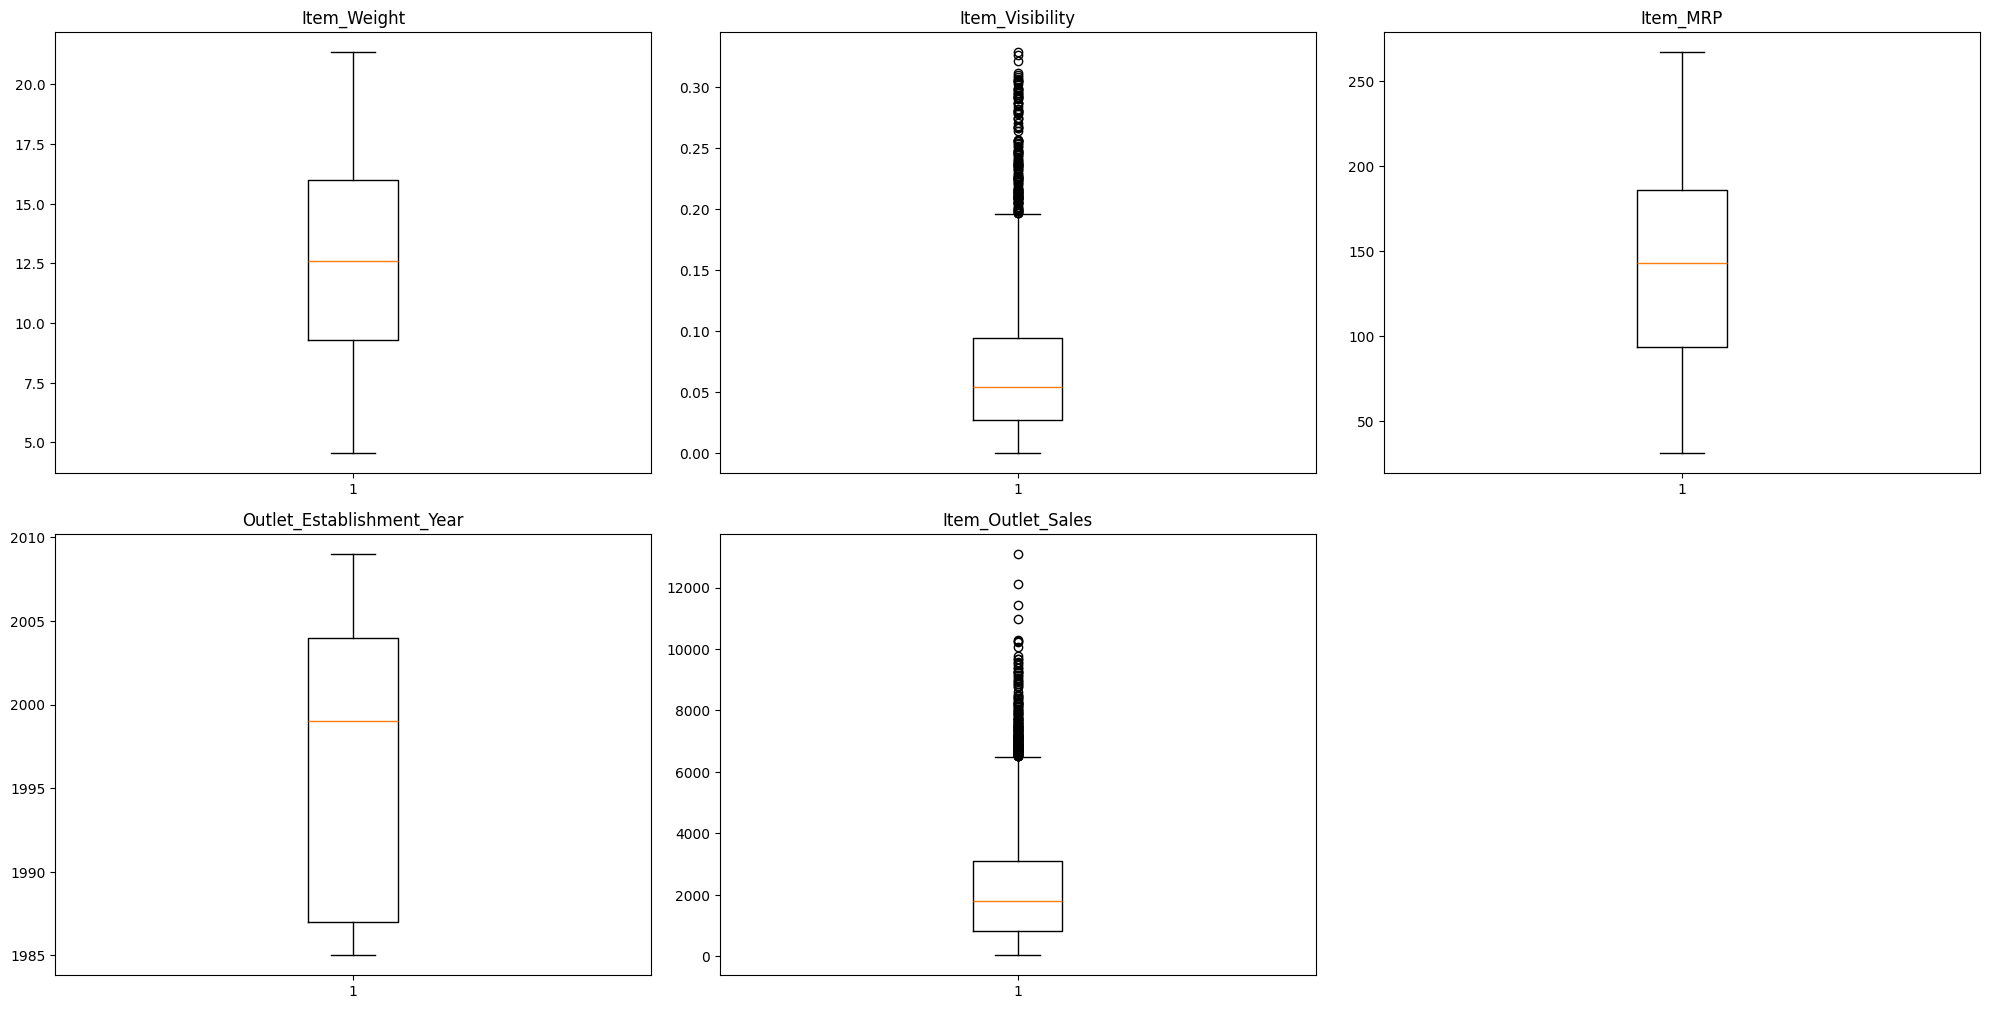

In [31]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(cont_data.columns):
    plt.subplot(4,3, i+1)
    plt.boxplot(train_data[col])
    plt.title(col)
plt.tight_layout()
plt.show

### Remove Outliers Using the IQR (Inter-Quartile Range)

the outliers are those small zeros you're seeing on top of the MAX and bellow the MIN on the boxplots.

In [32]:
import numpy as np  

def remove_outliers(columns):
    for col in columns:
        lower_quantile= train_data[col].quantile(0.25)
        upper_quantile= train_data[col].quantile(0.75)
        
        iqr = upper_quantile-lower_quantile
        
        upper_boundary= upper_quantile + 1.5 * iqr
        lower_boundary= lower_quantile - 1.5 * iqr
        
        train_data [col] = np.where(train_data[col] > upper_boundary, upper_boundary, train_data[col])
        train_data [col] = np.where(train_data[col] < lower_boundary, lower_boundary, train_data[col])

In [33]:
train_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [34]:
# Now we use this function to remove the outliers from our data. here is how we do :

remove_outliers(['Item_Visibility', 'Item_Outlet_Sales'])

<function matplotlib.pyplot.show(close=None, block=None)>

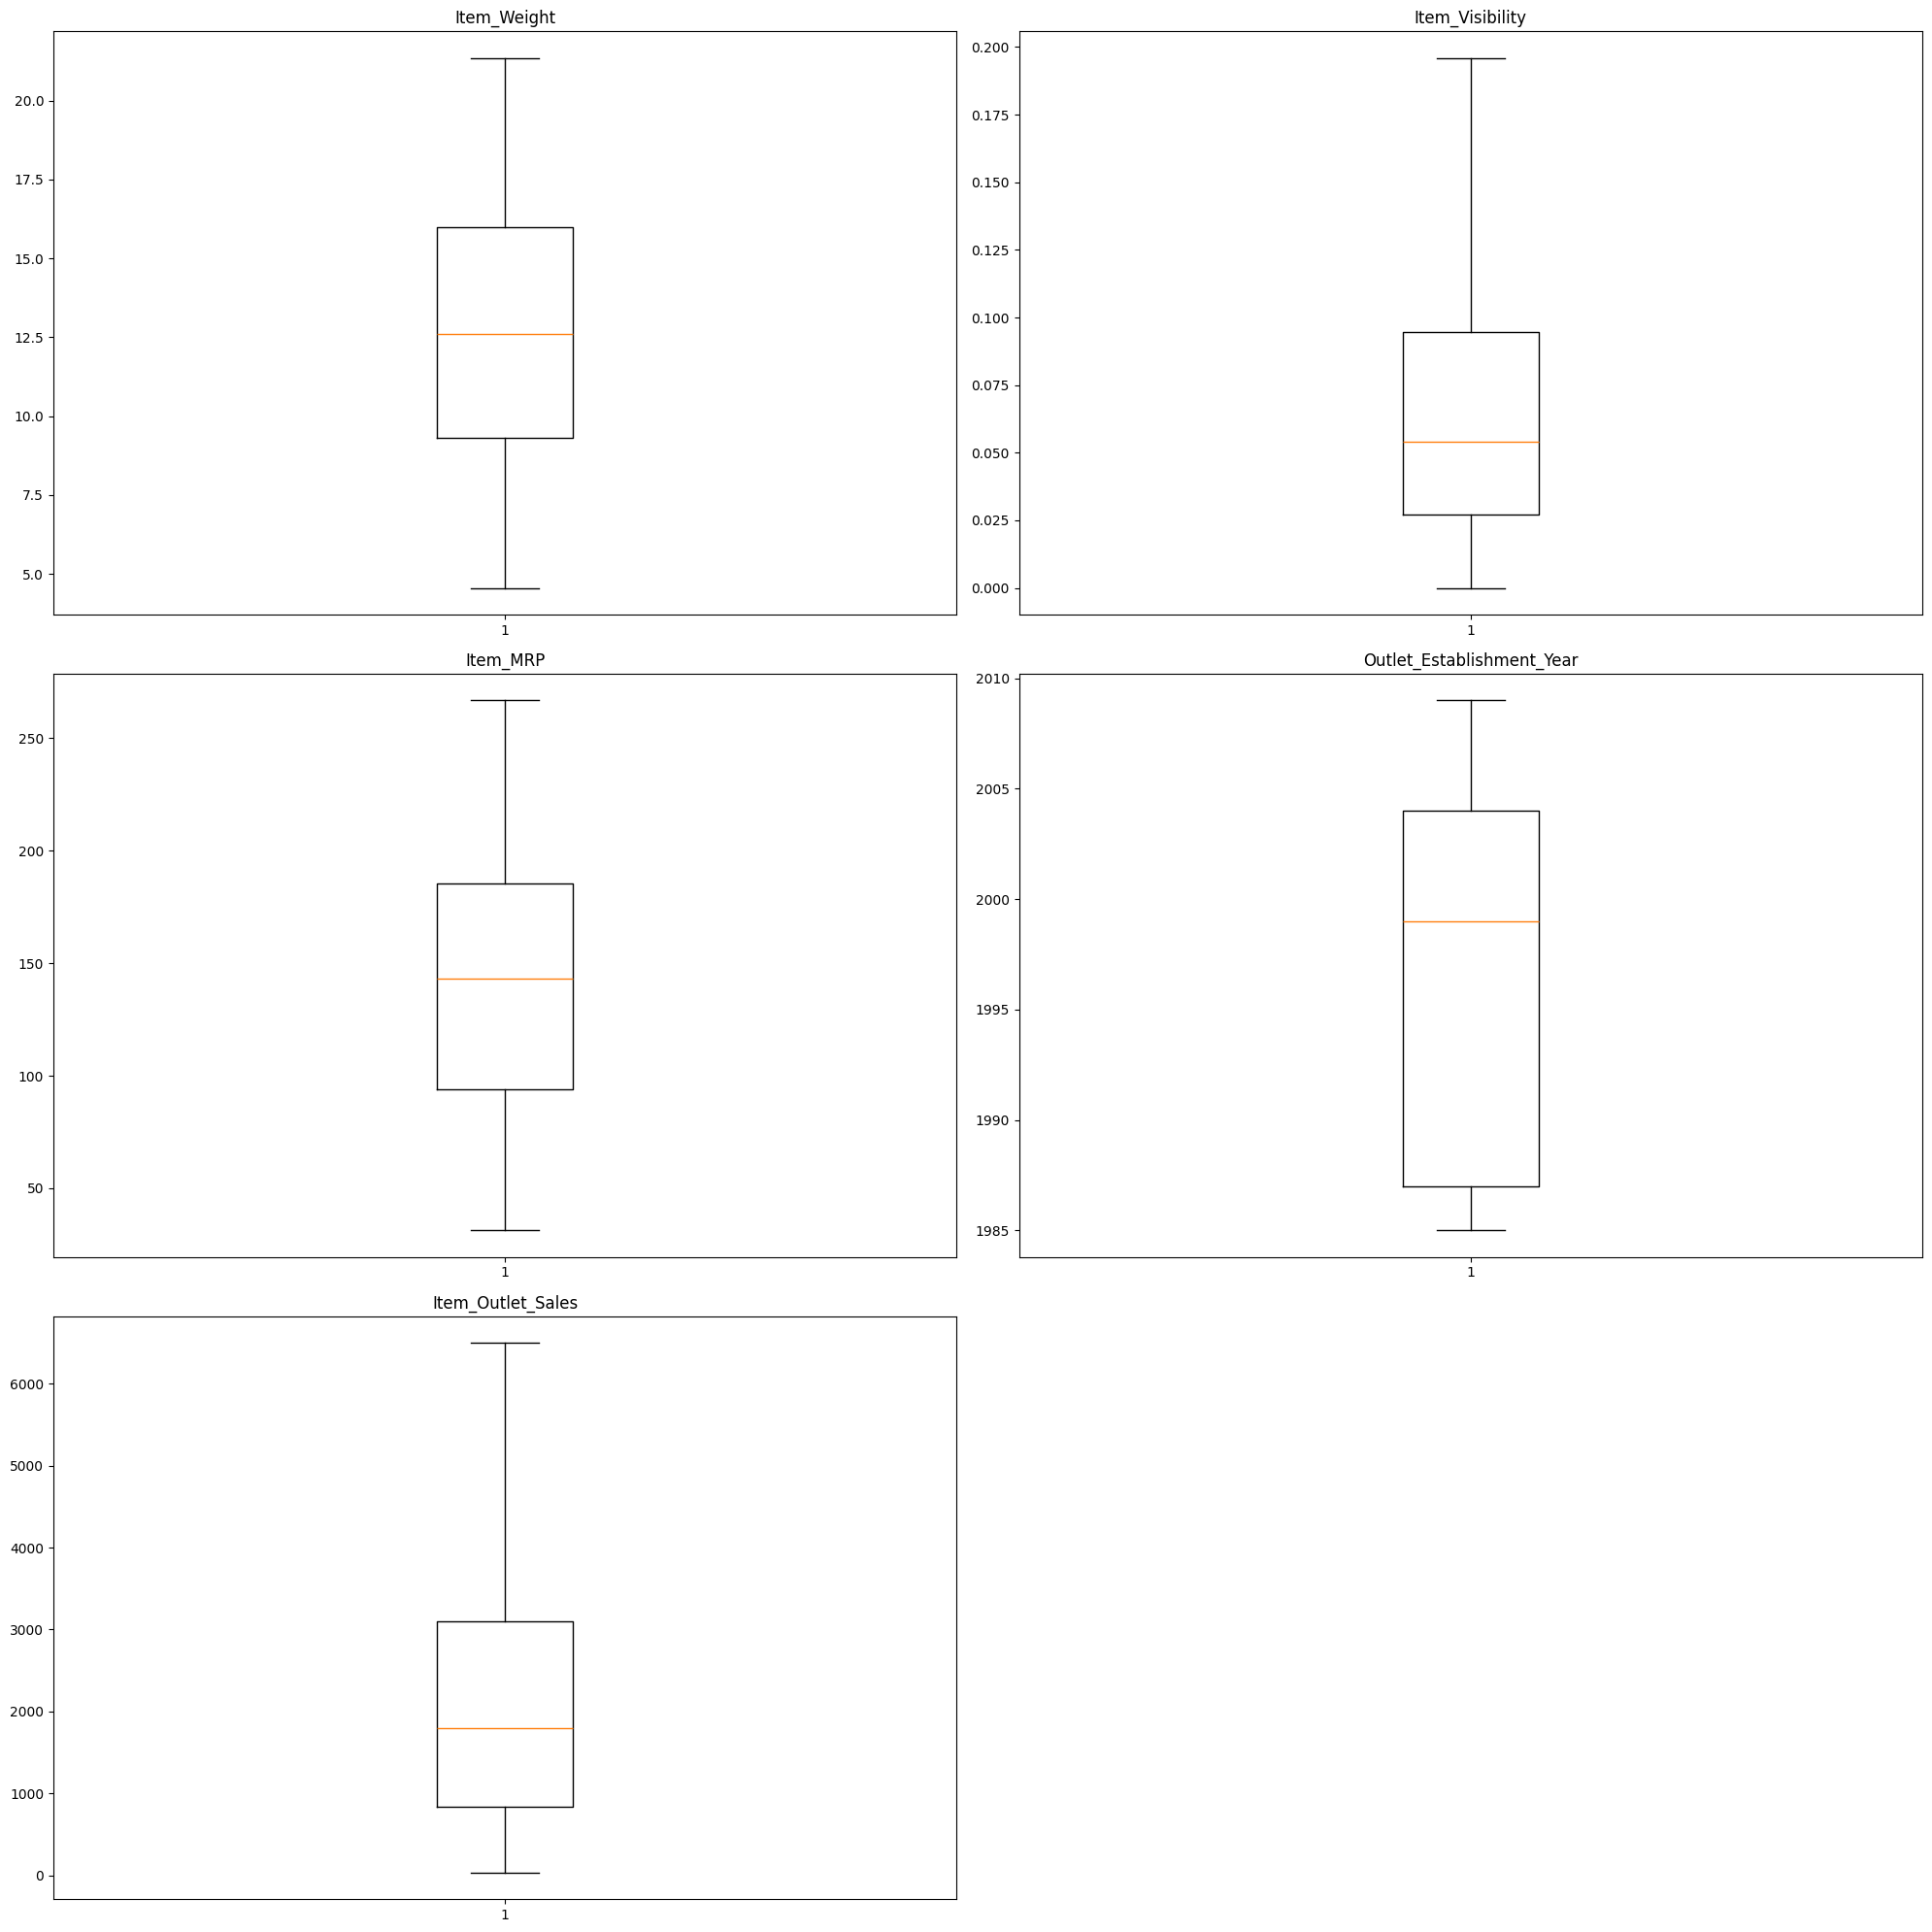

In [35]:
# then we visualize again to check if the outliers have been removed.

plt.figure(figsize=(20, 20))
for i, col in enumerate(cont_data.columns):
    plt.subplot(3,2, i+1)
    plt.boxplot(train_data[col])
    plt.title(col)
plt.tight_layout()
plt.show

Still have some issues here 👆🏽

In [36]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [37]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [38]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [39]:
import pandas as pd

# List of specified values
values = [10, 15, 23, 38, 23, 29, 45, 23, 29, 1, 42, 53, 54, 100]

# Create a DataFrame with a single column named 'value'
df = pd.DataFrame(values, columns=['value'])

# Display the DataFrame
print(df)

    value
0      10
1      15
2      23
3      38
4      23
5      29
6      45
7      23
8      29
9       1
10     42
11     53
12     54
13    100


In [40]:
from scipy import stats
import numpy as np
df ['z_score'] = stats.zscore(df['value'])
threshold = 2
print(df)
#filtered_data = df[np.abs(df['z_score']) < threshold]


    value   z_score
0      10 -1.047298
1      15 -0.834803
2      23 -0.494810
3      38  0.142675
4      23 -0.494810
5      29 -0.239816
6      45  0.440169
7      23 -0.494810
8      29 -0.239816
9       1 -1.429789
10     42  0.312672
11     53  0.780161
12     54  0.822660
13    100  2.777616


{'whiskers': [<matplotlib.lines.Line2D at 0x172b752b530>,
 'caps': [<matplotlib.lines.Line2D at 0x172b752bc20>,
 'boxes': [<matplotlib.lines.Line2D at 0x172b84ad580>],
 'medians': [<matplotlib.lines.Line2D at 0x172b752afc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x172b75293d0>],
 'means': []}

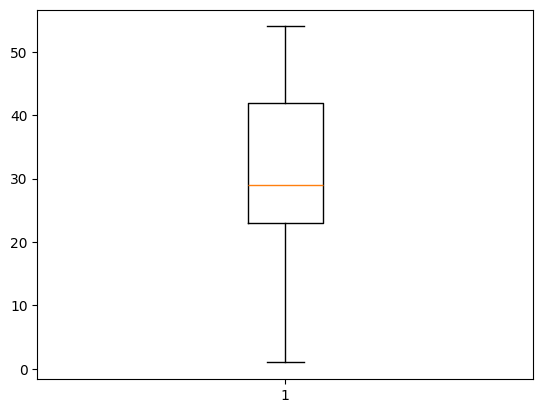

In [41]:
import matplotlib.pyplot as plt
plt.boxplot(filtered_data['value'])

In [42]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,1794.3310


In [44]:
train_data["Item_Outlet_Sales"].dtypes


dtype('float64')

In [46]:
cont_data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,NaN
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


<Axes: >

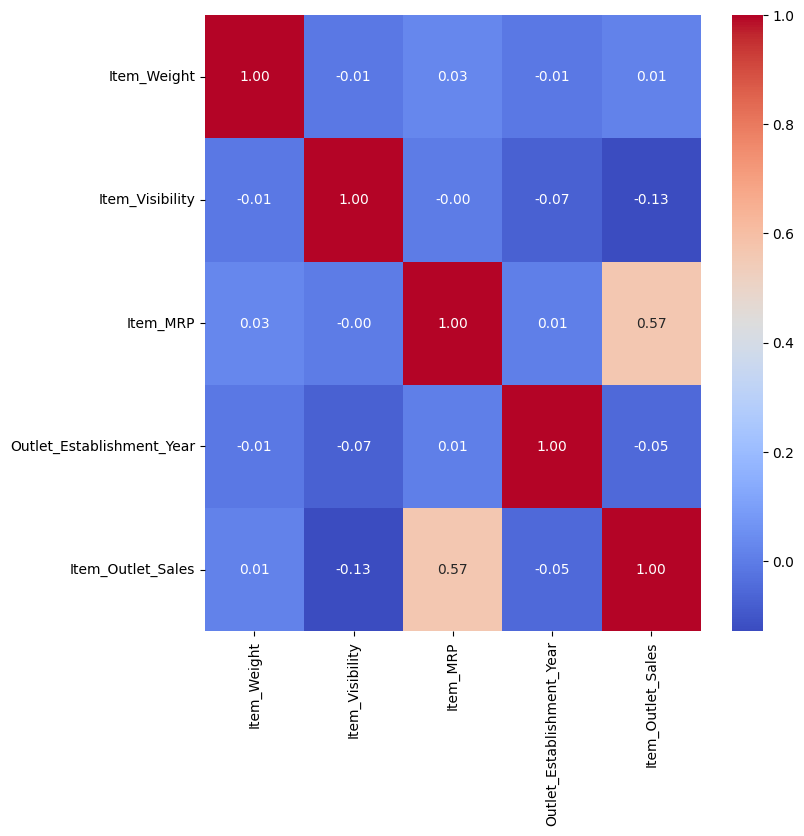

In [47]:
import seaborn as sns

correlation_matrix=cont_data.corr()
correlation_matrix

plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")